In [29]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
true_N = 500
D = pm.rdiscrete_uniform(1, true_N, size=10)

In [4]:
max_count = 10000

In [35]:
alpha = 2.0

In [36]:
classes = np.arange(D.max(), max_count + 1)

In [37]:
classes = classes ** (-alpha) # the bigger the value, the smaller the prob

In [38]:
classes /= np.sum(classes) # make it a prop distrib

In [39]:
N = pm.Categorical("N", classes)

In [40]:
# there have to be more trains than the highest number observed
@pm.deterministic(dtype='int')
def N_shifted(N=N, shift=D.max()):
    return N + shift

In [41]:
obs = pm.DiscreteUniform('obs', lower=0, upper=N_shifted, value=D, observed=True)

In [42]:
model = pm.Model([obs, N_shifted, N])

In [43]:
mcmc = pm.MCMC(model)

In [44]:
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 3.9 sec

In [45]:
N_trace = mcmc.trace(N_shifted)[:]

In [46]:
N_trace.mean()

547.2247

(array([2.2491e+04, 5.2390e+03, 1.4620e+03, 4.3200e+02, 1.9900e+02,
        7.2000e+01, 7.7000e+01, 9.0000e+00, 1.3000e+01, 6.0000e+00]),
 array([ 497. ,  563.5,  630. ,  696.5,  763. ,  829.5,  896. ,  962.5,
        1029. , 1095.5, 1162. ]),
 <a list of 10 Patch objects>)

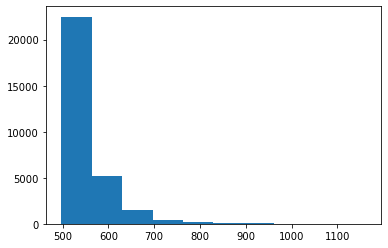

In [47]:
plt.hist(N_trace)

In [48]:
D.max()

497

In [49]:
np.median(N_trace)

529.0